In [3]:
import pandas as pd
import os

##### Merging 12 months of sales data into a single file

In [4]:
all_merged = pd.DataFrame()
files = [file for file in os.listdir('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')]

for file in files:
    df = pd.read_csv("Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+file)
    all_merged = pd.concat([all_merged,df])

all_merged.to_csv("all_months_data.csv",index=False)

In [5]:
all_data = pd.read_csv('all_months_data.csv')

##### Adding a months column

In [6]:
all_data['Month'] = all_data['Order Date'].str[0:2]

##### Removing NaN Rows

In [7]:
all_data.dropna(axis=0,how='all',inplace=True)

##### Removing duplicate heading Rows

In [8]:
all_data = all_data.loc[(all_data['Order Date'] != 'Order Date')]

##### Adding a Sales Column

In [9]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #Converting DataType to Int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) #Converting DataType to Float
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.reset_index(drop=True, inplace=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04,11.99


## The Best month for sales

In [10]:
sales_data = all_data.groupby('Month').sum(numeric_only=True)
sales_data


,Quantity Ordered,Price Each,Sales
Month,,,
01,10903,1811768.38,1822256.73
02,13449,2188884.72,2202022.42
03,17005,2791207.83,2807100.38
04,20558,3367671.02,3390670.24
05,18667,3135125.13,3152606.75
06,15253,2562025.61,2577802.26
07,16072,2632539.56,2647775.76
08,13448,2230345.42,2244467.88
09,13109,2084992.09,2097560.13


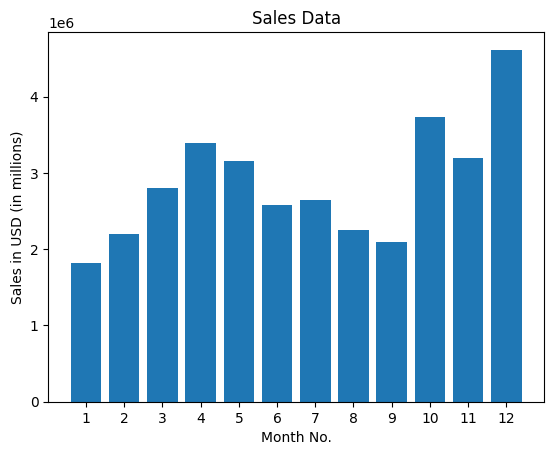

In [11]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,sales_data['Sales'])
plt.title('Sales Data')
plt.xticks(months)
plt.xlabel('Month No.')
plt.ylabel('Sales in USD (in millions)')
plt.show()

## City that Sold the most product

##### Adding a City Column

In [12]:
all_data['City'] = all_data['Purchase Address'].str.split(',').str[1] + ' ' + all_data['Purchase Address'].str.split(',').str[2].str[1:3]

In [13]:
city_sales = all_data.groupby('City').sum(numeric_only=True)
city_sales

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta GA,16602,2779908.20,2795498.58
Austin TX,11153,1809873.61,1819581.75
Boston MA,22528,3637409.77,3661642.01
Dallas TX,16730,2752627.82,2767975.40
Los Angeles CA,33289,5421435.23,5452570.80
New York City NY,27932,4635370.83,4664317.43
Portland ME,2750,447189.25,449758.27
Portland OR,11303,1860558.22,1870732.34
San Francisco CA,50239,8211461.74,8262203.91


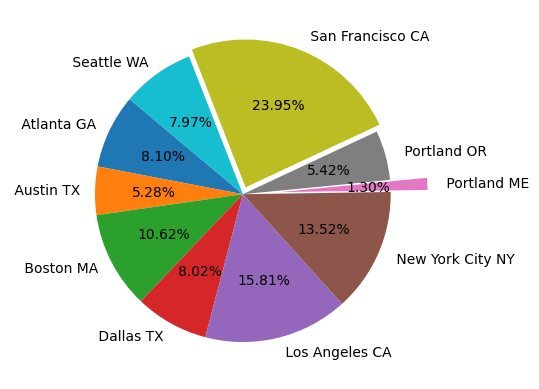

In [14]:
city_name = city_sales.index
plt.pie(city_sales['Sales'],labels=city_name,autopct="%.2f%%",explode=[0,0,0,0,0,0,0.25,0,0.05,0],startangle=140)
plt.show()

## Best time to display advertisements to maximise liklihood of customer's buying product 

In [15]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

C:\Users\Utkarsh\AppData\Local\Temp\ipykernel_18004\3842191188.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [16]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA


In [17]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",04,23.90,Dallas TX,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",04,99.99,Boston MA,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,600.00,Los Angeles CA,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",04,11.99,Los Angeles CA,9


In [18]:
sales_time = all_data.groupby(['Hour']).count()
sales_time

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


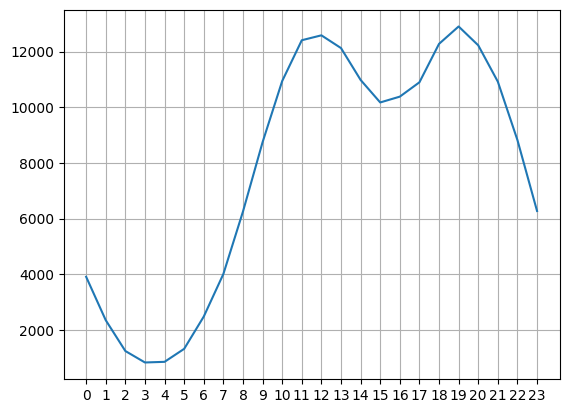

In [19]:

plt.plot(sales_time.index,sales_time['Quantity Ordered'])
plt.xticks(sales_time.index)
plt.grid()
plt.show()

By analysing the above graph, we can conclude that the best time to show ads is near 11am to 1pm and 6pm to 8pm

## Most Sold Products

In [20]:
product_count = all_data.groupby(['Product']).count()
product_count = product_count.sort_values(by='Quantity Ordered')
product_count

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
Product,,,,,,,,,
LG Dryer,646,646,646,646,646,646,646,646,646
LG Washing Machine,666,666,666,666,666,666,666,666,666
Vareebadd Phone,2065,2065,2065,2065,2065,2065,2065,2065,2065
20in Monitor,4101,4101,4101,4101,4101,4101,4101,4101,4101
ThinkPad Laptop,4128,4128,4128,4128,4128,4128,4128,4128,4128
Macbook Pro Laptop,4724,4724,4724,4724,4724,4724,4724,4724,4724
Flatscreen TV,4800,4800,4800,4800,4800,4800,4800,4800,4800
Google Phone,5525,5525,5525,5525,5525,5525,5525,5525,5525
34in Ultrawide Monitor,6181,6181,6181,6181,6181,6181,6181,6181,6181


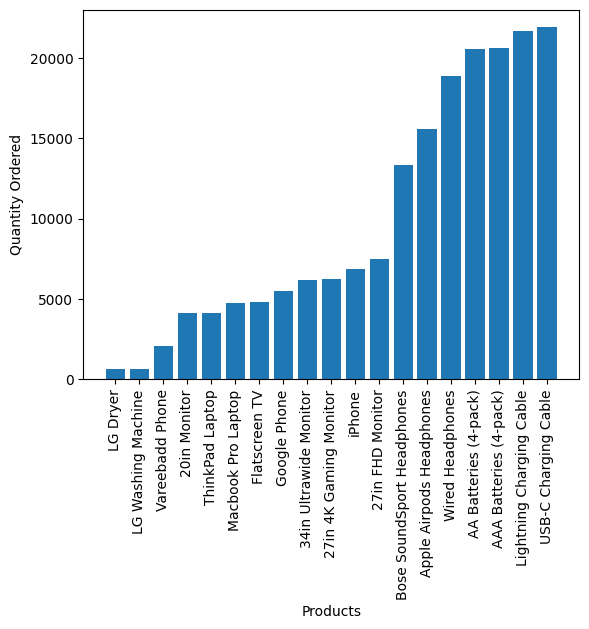

In [ ]:
plt.bar(product_count.index,product_count['Quantity Ordered'])
plt.xticks(rotation=90)  
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()

## Products most often sold together

In [ ]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Combination'] = df.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Combination']].drop_duplicates()
df

In [ ]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Combination']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

together = count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 360), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Lightning Charging Cable', 'Wired Headphones'), 92)]


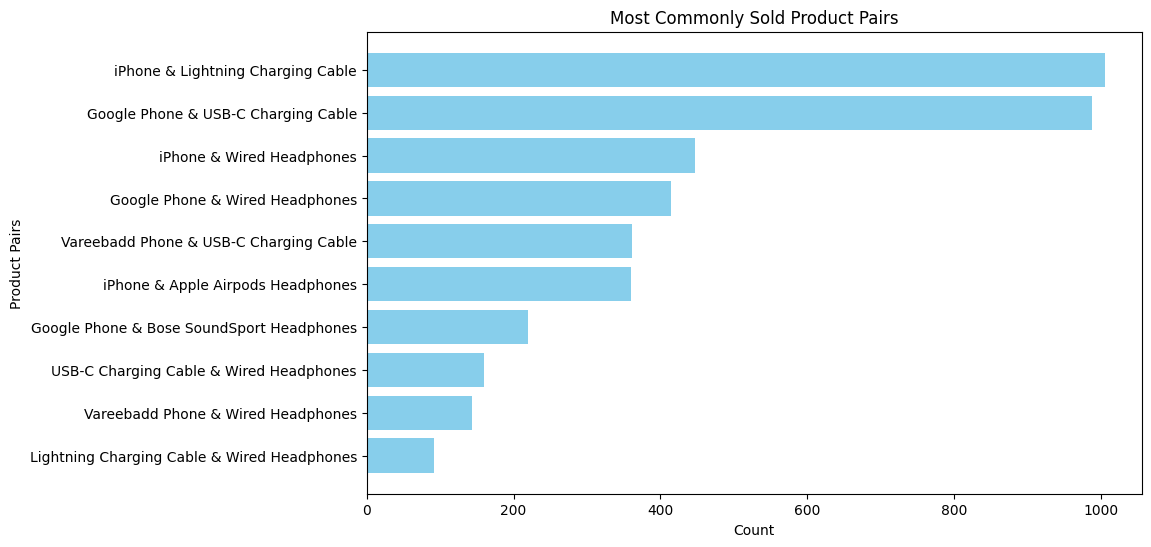

In [32]:

# Extract labels and values
labels = [f"{item[0][0]} & {item[0][1]}" for item in together]  # Combining product pairs into strings
values = [item[1] for item in together]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel("Count")
plt.ylabel("Product Pairs")
plt.title("Most Commonly Sold Product Pairs")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

